# Yulu Bikes Case Study

# About Yulu:

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.



# Problem Statement
Yulu's recent revenue decline is a pressing concern. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market. As a Data scientist we are looking at the dataset to present a positive suggestion to regain profitability in the market.

# 1.0 Importing Libraries and loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
!gdown 'https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i' -O 'bike_sharing.csv'


Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 88.2MB/s]


In [ ]:
df = pd.read_csv('/content/bike_sharing.csv')

#2.0 Exploratory Data Analysis

In [ ]:
df.sample(10, random_state= 42)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3133,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,29,98,127
5786,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,0,13,13
5224,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,12,151,163
8953,2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,70,163,233
8054,2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,46,176,222
10044,2012-11-03 21:00:00,4,0,0,1,13.94,17.425,53,7.0015,31,135,166
5337,2011-12-16 11:00:00,4,0,1,2,13.94,15.150,42,19.9995,9,135,144
2753,2011-07-03 15:00:00,3,0,0,1,34.44,40.150,53,19.9995,194,182,376
10127,2012-11-07 08:00:00,4,0,1,2,10.66,12.120,60,19.0012,18,583,601
33,2011-01-02 10:00:00,1,0,0,2,14.76,17.425,81,15.0013,7,46,53


Insights
- It is clear that certain categorical column's value are numbered instead of strings.
- It is a good practice to replace them according to have better visual representation aspect.

In [ ]:
df_unique_values = df.copy()
df.shape

(10886, 12)

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Insights
- There are no null values in our dataset.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Insight
- There are totally 10886 rows and 12 columns.
- The data type of columns are wrongfully assigned and needed to be assigned appropriately.

Further Action-
- Change the data type of the columns to fit the analysis.

## 2.1 Changing the data types of columns
- datetime --> to datetime
- season --> to categorical variable
- holiday --> to categorical variable
- workingday --> to categorical variable
- weather --> to categorical variable

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


- All the datatypes are changed perfectly.

## 2.2 Handling the datetime column

### 2.2.1 Splitting the datetime column

In [ ]:
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month_name().str[:3]
df['year'] = df['datetime'].dt.year
df['month']

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
10881    Dec
10882    Dec
10883    Dec
10884    Dec
10885    Dec
Name: month, Length: 10886, dtype: object

### 2.2.2 Assessing the column

In [ ]:
print(df['datetime'].min())
print(df['datetime'].max())
print(df['datetime'].max() - df['datetime'].min())

2011-01-01 00:00:00
2012-12-19 23:00:00
718 days 23:00:00


Insights
- The dataset have records for 718 days and it starts from 01/01/2011 and goes upto 19/12/2012.

## 2.3 Checking for nested vaues

In [ ]:
def nested_values_check():
  df_check = df.copy() # Creating a copy to have the main dataframe unaffected.
  for i in df_check.columns:
    df_check[i] = df_check[i].astype('str')
    if df_check[i].str.contains(', ').any():
      print(f'{i} column --> Have nested values')
    else:
      print(f'{i} column --> No nested values')

nested_values_check()

datetime column --> No nested values
season column --> No nested values
holiday column --> No nested values
workingday column --> No nested values
weather column --> No nested values
temp column --> No nested values
atemp column --> No nested values
humidity column --> No nested values
windspeed column --> No nested values
casual column --> No nested values
registered column --> No nested values
count column --> No nested values
day column --> No nested values
month column --> No nested values
year column --> No nested values


- We can confidently say that there are no nested values in our column.


## 2.4 Accessing the unique values in each column

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
day              19
month            12
year              2
dtype: int64

In [ ]:
for i in df.columns:
  if df[i].dtype == 'int64' or df[i].dtype == 'float64':
    print(i)
    print(np.sort(df[i].unique()))
    print('\n')
  else:
    print(i)
    print(df[i].unique())
    print('\n')

datetime
<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
 '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
 '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
 '2012-12-19 23:00:00']
Length: 10886, dtype: datetime64[ns]


season
[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


holiday
[0, 1]
Categories (2, int64): [0, 1]


workingday
[0, 1]
Categories (2, int64): [0, 1]


weather
[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


temp
[ 0.82  1.64  2.46  3.28  4.1   4.92  5.74  6.56  7.38  8.2   9.02  9.84
 10.66 11.48 12.3  13.12 13.94 14.76 15.58 16.4  17.22 18.04 18.86 19.68
 20.5  21.32 22.14 22.96 23.78 24.6  25.42 26.24 27.06 27.88 28.7  29.52
 30.34 31.16 31.98 32.8  

Insights
- The following columns - season, holiday, workingday, weather needed their values to suit better analysis.
- Also the days recorded are from 1 to 19.


## 2.5 Replacing the appropriate values for respective column

In [ ]:
cols =  ['season', 'holiday', 'workingday', 'weather']
df['season'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['holiday'] = df['holiday'].replace({0: 'No', 1: 'Yes'})
df['workingday'] = df['workingday'].replace({0: 'No', 1: 'Yes'})
df['weather'] = df['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})


## 2.6 Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

Insights
- There are no duplicate values.

## 2.7 Comprehensive understanding of the dataset

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
day,10886.0,9.992559,1.0,5.0,10.0,15.0,19.0,5.476608
year,10886.0,2011.501929,2011.0,2011.0,2012.0,2012.0,2012.0,0.500019


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
season,10886,4,winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,Clear,7192


Insights
- We have records for 2 years.
- Numerical features casual and registered bike rentals have high standard deviations and small mean indicating outliers and lots of diverse ranges and distributions.
- This can be an indication that the rental will be based on lots of conditions and will be different with each given condition.

# 3.0 Univariate Analysis

In [ ]:
categorical = ['season', 'holiday', 'workingday', 'weather', 'month', 'year']
numerical = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

## 3.1 Numerical Variables

### 3.1.1Detecting Outliers

Total number of the outliers in the temp column is 0
Total number of the outliers in the atemp column is 0
Total number of the outliers in the humidity column is 22
Total number of the outliers in the windspeed column is 227
Total number of the outliers in the casual column is 749
Total number of the outliers in the registered column is 423
Total number of the outliers in the count column is 300


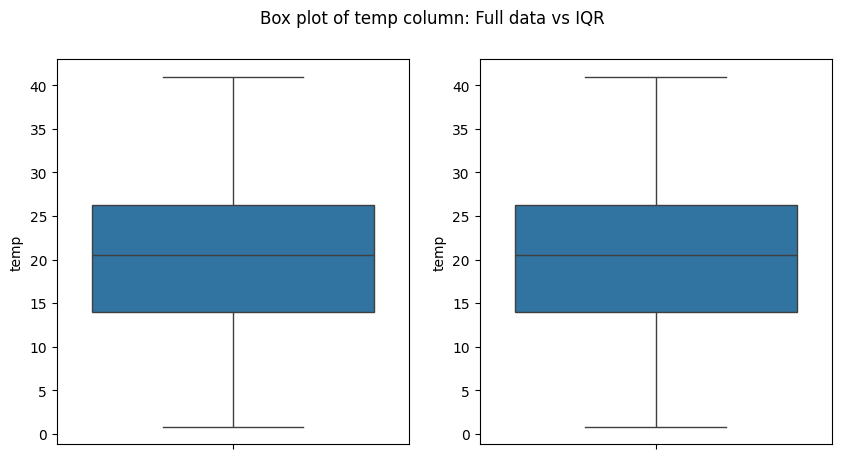

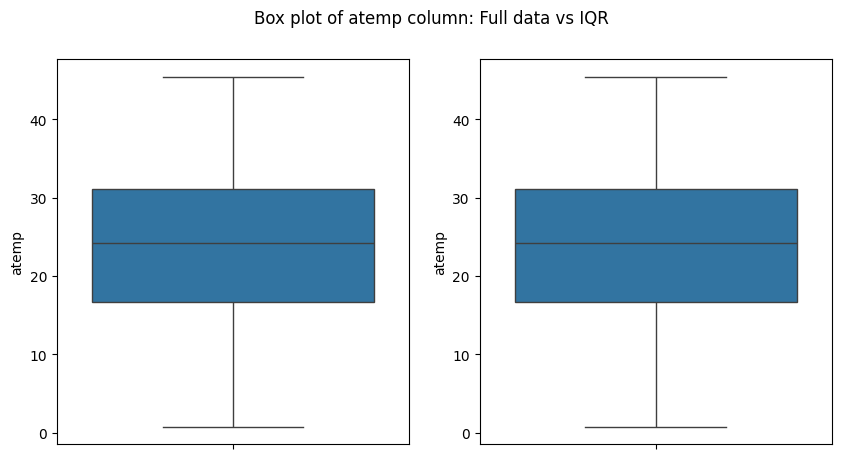

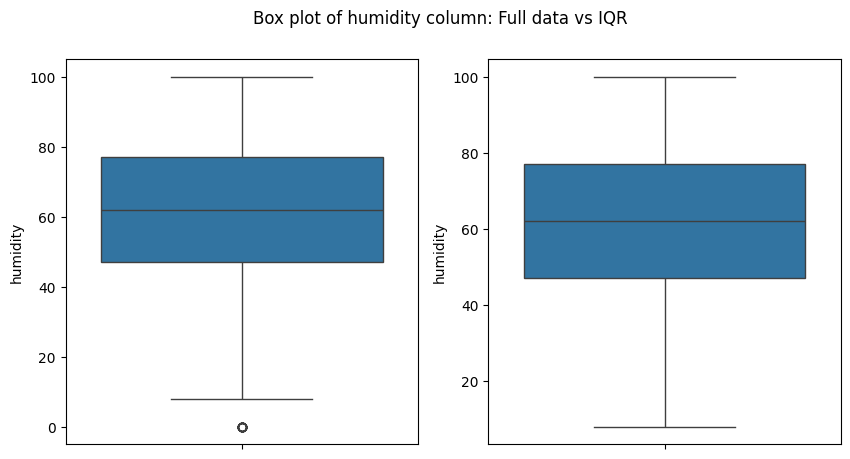

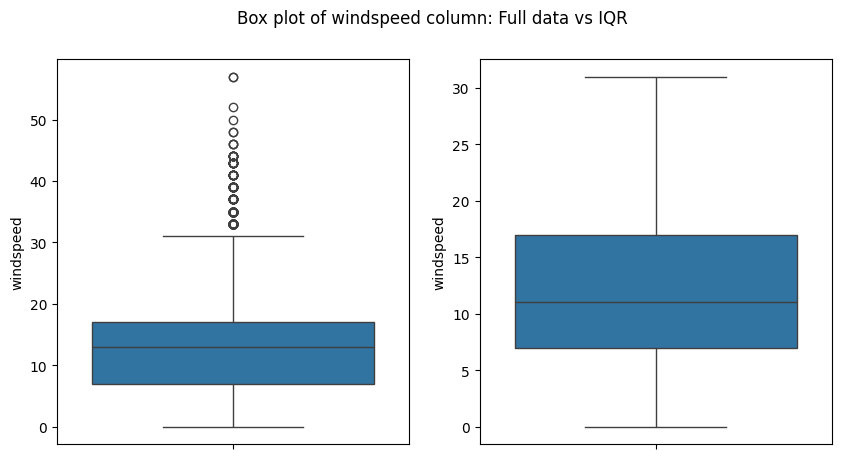

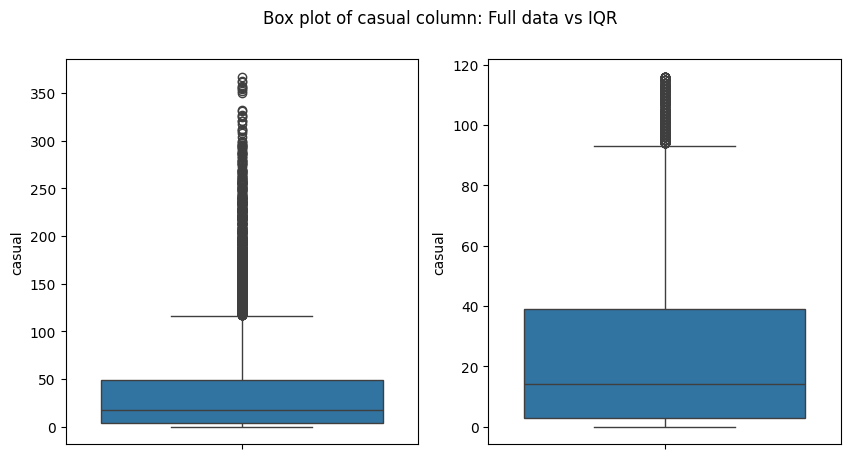

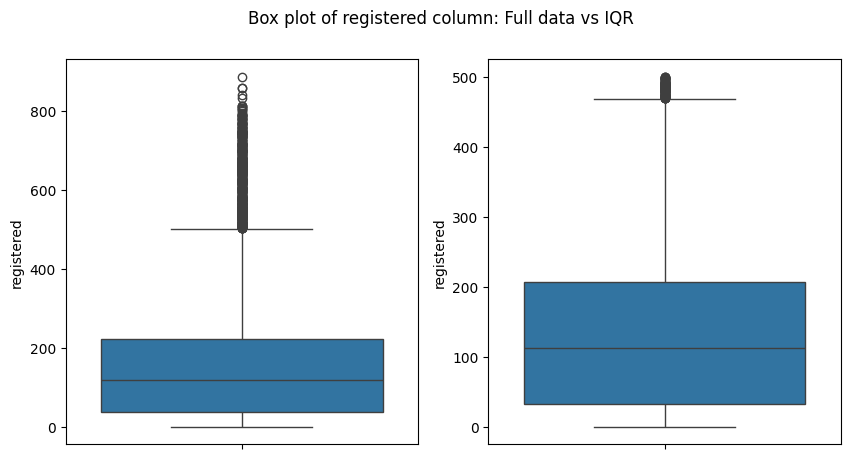

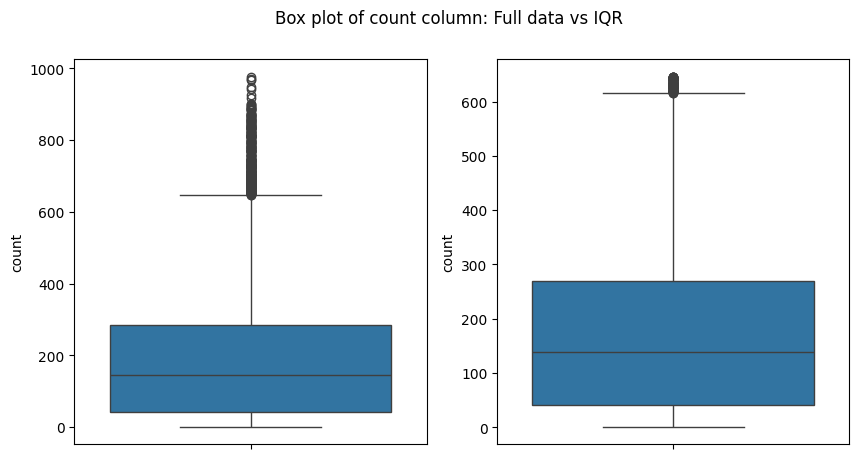

In [ ]:
def det_out():
  for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(df[i], ax=ax[0])
    plt.suptitle(f'Box plot of {i} column: Full data vs IQR')

    # Calculating the Quantiles
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    # Calculating the IQR
    IQR = Q3 - Q1

    # Setting lower and upper limit to seperate the outliers
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Calulating the Total outliers
    lower_outliers = df[df[i] < lower_limit]
    upper_outliers = df[df[i] > upper_limit]
    tot_out = len(lower_outliers) + len(upper_outliers)
    print(f'Total number of the outliers in the {i} column is {tot_out}')

    # Removing Outliers
    remove_outliers =  df[(df[i] > lower_limit) & (df[i] < upper_limit)]

    # Boxplot with Outliers removed
    sns.boxplot(data = remove_outliers[i], ax = ax[1])

det_out()

Insight-
- As per our previous inference there are certainly lots of ouliers and they are removed using IQR.
- Now we can further look at the dependencies for these outliers.


### 3.1.2 Analysis of numerical variable through Histplot

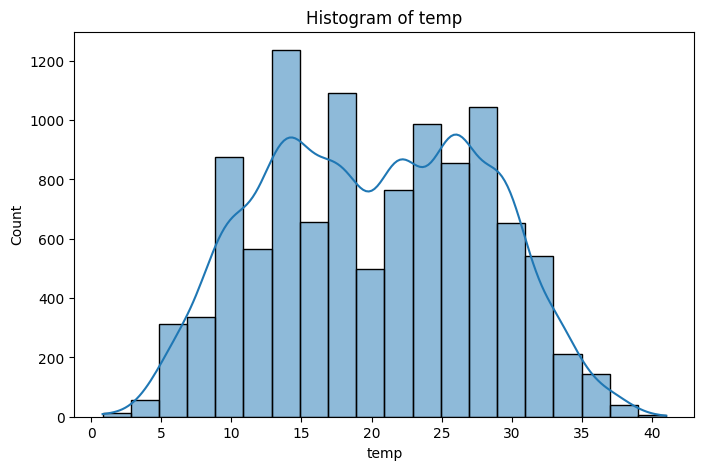

,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


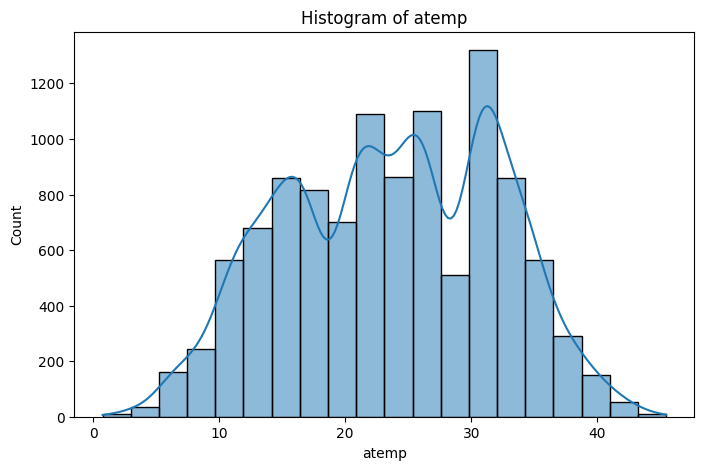

,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


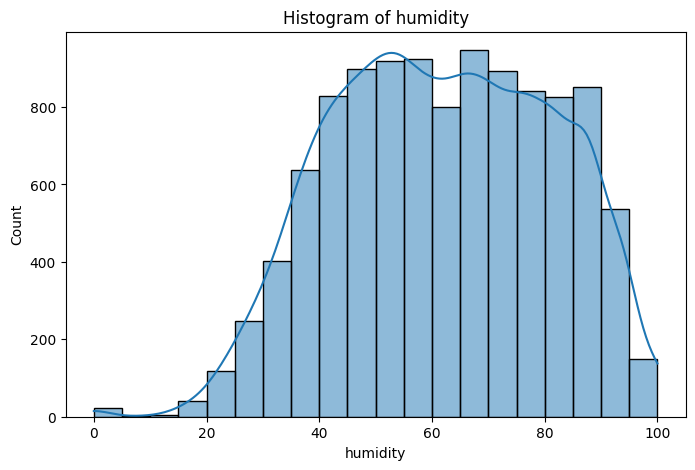

,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


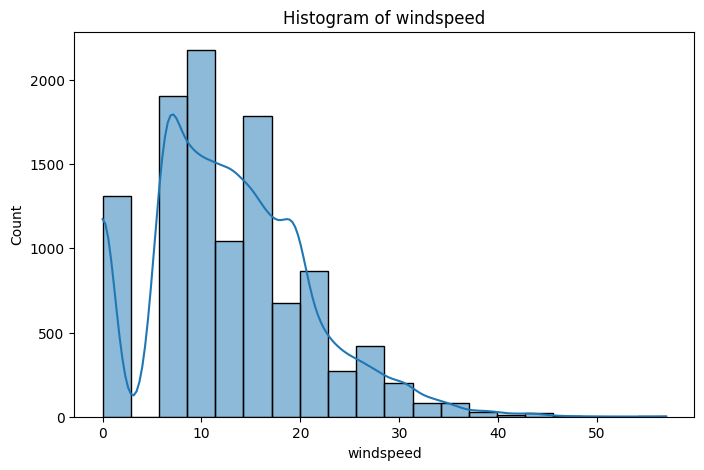

,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


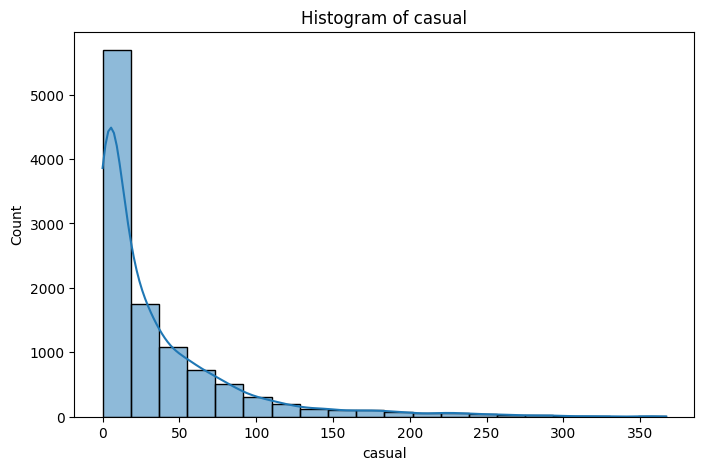

,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


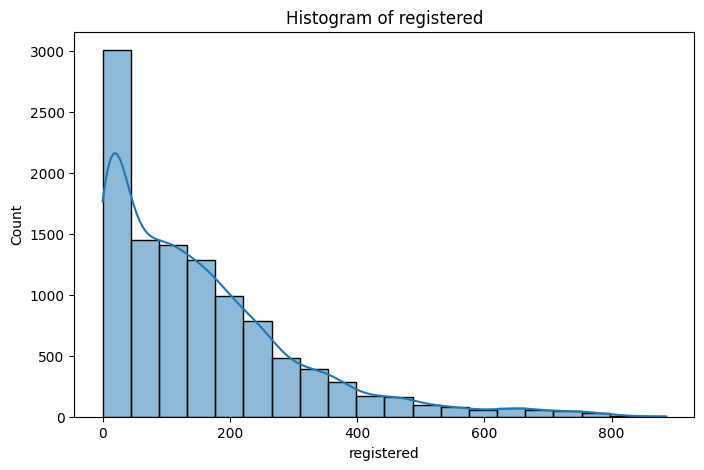

,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


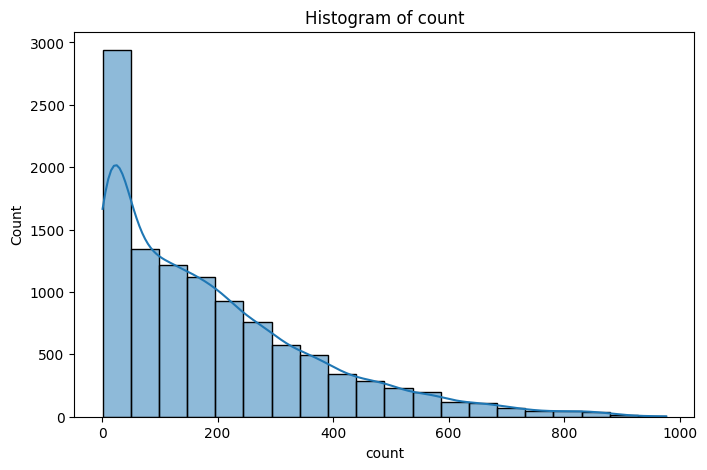

,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


In [ ]:
for i in numerical:
  fig, ax = plt.subplots(1, 1, figsize = (8,5))
  sns.histplot(df[i], bins=20, kde=True, ax = ax)
  plt.title(f'Histogram of {i}')
  plt.show()

  tabular_data = df[i].describe().reset_index()
  tabular_data.columns = ['Statistic', 'Value']
  display(tabular_data)


Insight
- The columns such as casual, registered and count are right skewed.
- Since log-normal distribution is a right skewed continuous probability distribution, we can safely assume it follow a log normal distribution. Therefore CLT could be an option.
- It is safe to assume the natural featues almost looks like they follow a normal distribution.

In [ ]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

## 3.2 Categorical Variable

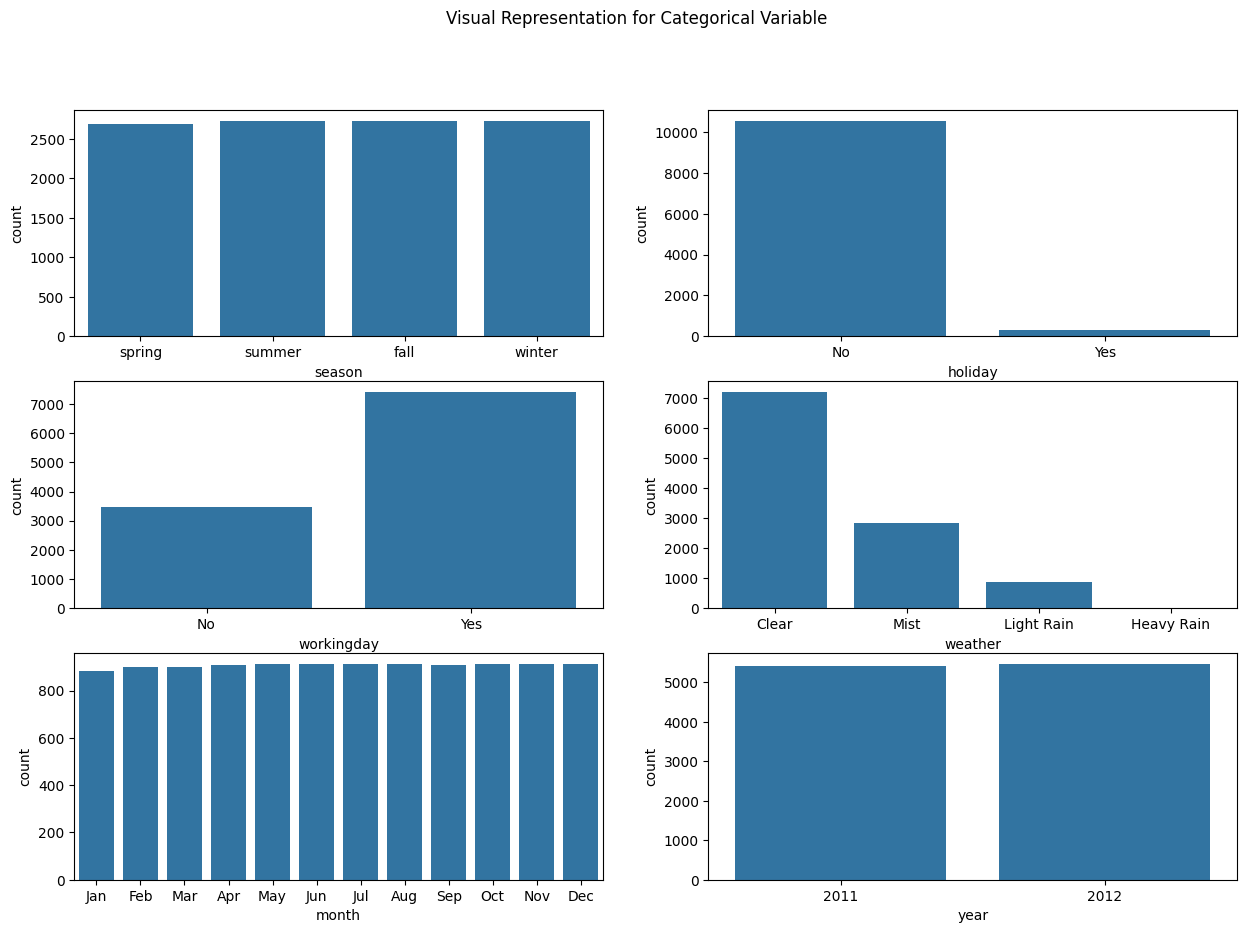

In [ ]:
# categorical = ['season', 'holiday', 'workingday', 'weather', 'month', 'year']
fig, axs= plt.subplots(3,2 , figsize=(15,10))
sns.countplot(data=df,x='season',ax=axs[0,0])
sns.countplot(data=df,x='holiday',ax=axs[0,1])
sns.countplot(data=df,x='workingday',ax=axs[1,0])
sns.countplot(data=df,x='weather',ax=axs[1,1])
sns.countplot(data=df,x='month',ax=axs[2,0])
sns.countplot(data=df,x='year',ax=axs[2,1])
plt.suptitle('Visual Representation for Categorical Variable')
plt.show()

<ipython-input-589-df1dcd13d9b1>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-589-df1dcd13d9b1>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)
<ipython-input-589-df1dcd13d9b1>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,3)


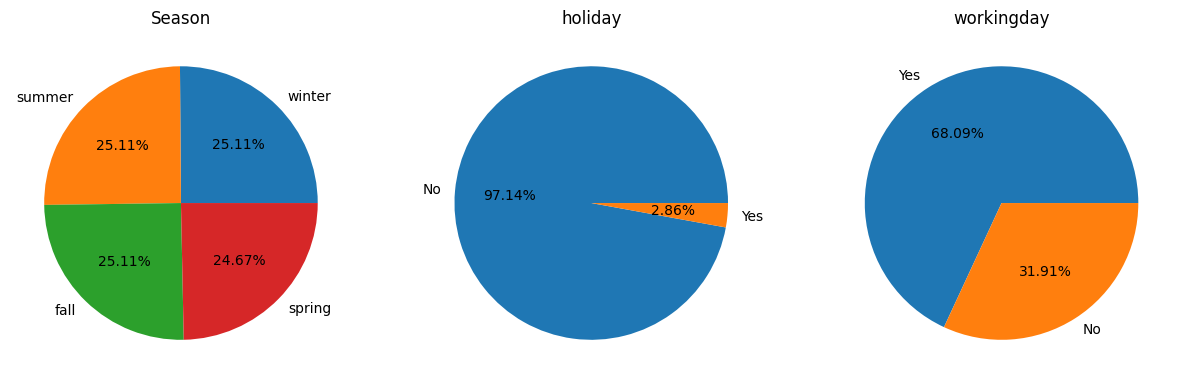

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(15,7))

plt.subplot(1,3,1)
pie = df['season'].value_counts().to_frame()
labels = pie.index
values = pie['count'].to_list()
plt.pie(values, labels = labels, autopct= '%0.2f%%')
plt.title('Season')

plt.subplot(1,3,2)
pie = df['holiday'].value_counts().to_frame()
labels = pie.index
values = pie['count'].to_list()
plt.pie(values, labels = labels, autopct= '%0.2f%%')
plt.title('holiday')


plt.subplot(1,3,3)
pie = df['workingday'].value_counts().to_frame()
labels = pie.index
values = pie['count'].to_list()
plt.pie(values, labels = labels, autopct= '%0.2f%%')
plt.title('workingday')


plt.show()

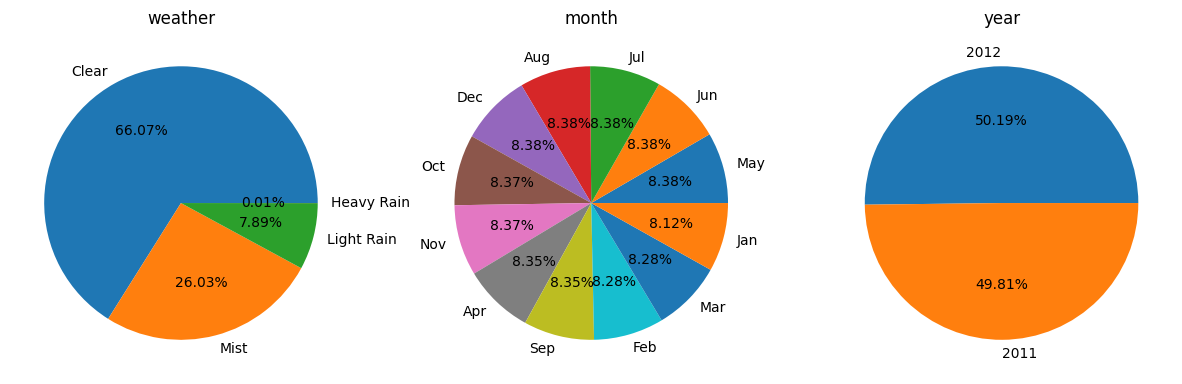

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15,7))

plt.subplot(1,3,1)
pie = df['weather'].value_counts().to_frame()
labels = pie.index
values = pie['count'].to_list()
plt.pie(values, labels = labels, autopct= '%0.2f%%')
plt.title('weather')


plt.subplot(1,3,2)
pie = df['month'].value_counts().to_frame()
labels = pie.index
values = pie['count'].to_list()
plt.pie(values, labels = labels, autopct= '%0.2f%%')
plt.title('month')


plt.subplot(1,3,3)
pie = df['year'].value_counts().to_frame()
labels = pie.index
values = pie['count'].to_list()
plt.pie(values, labels = labels, autopct= '%0.2f%%')
plt.title('year')


plt.show()

# 4.0 Relationship between the Dependent and Independent Variables.

## 4.1 Correlation Plot

In [ ]:
corr_data = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr_data.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


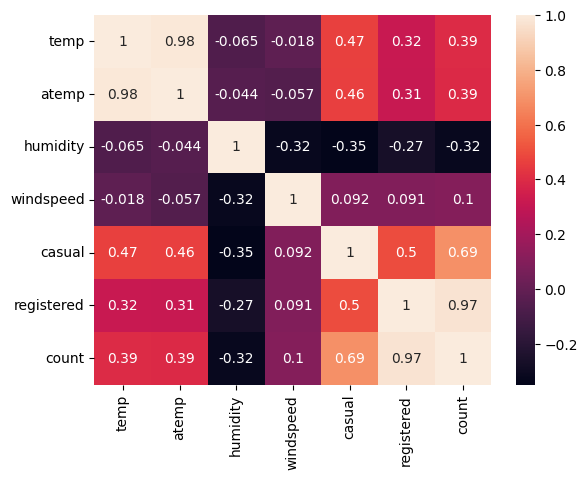

In [ ]:
sns.heatmap(corr_data.corr(), annot = True)

plt.show()

# 5.0 Hypothesis Testing

## 5.1 Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

We can consider Two Sample Independent T-Test. Meanwhile we have to check for normality before going ahead with the Two Sample Independent T-Test.


### 5.1.1 Test for Normality

*QQ-Plot*

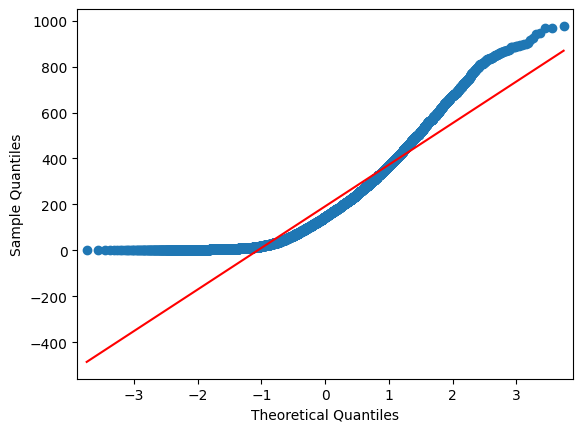

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['count'], line = 's')
plt.show()

Insight-
- It is clearly seen that it doesn't follow normal distribution but we will do an another test called Shapiro-Wilk to be more accurate.

*Shapiro-Wilk test*

In [ ]:
from scipy.stats import shapiro
count_subset = df.sample(100, random_state= 42)['count']
test_stat, p_value = shapiro(count_subset)

print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

3.6810121173402877e-08
Reject H0
Data is not Gaussian


### 5.1.2 Test of Variance

*Levene's Test*
- Since the it is not normally distributed, we can use Levene's Test to see whether this difference in variance is significant or not.
- Then we can make decision on going ahead with Two sample independent T-Test or not.

In [ ]:
from scipy.stats import levene

# Ho:  Variance across the group is similar
# Ha: Variance is not the same.

working_day = df[df['workingday'] == 'Yes']['count']
holiday = df[df['workingday'] == 'No']['count']

levene_stat, p_value = levene(working_day, holiday)

print(p_value)
if p_value < 0.05:
  print("Variances are not equal")
else:
  print("Variances are equal")


0.9437823280916695
Variances are equal


### 5.1.3 Two Sample Independent T-Test

In [ ]:
from scipy.stats import ttest_ind

# Formulating Null Hypothesis (H0) and Alternate Hypothesis (Ha)

# Ho: Number of bike rides are same on weekdays and weekends.
# Ha: There is a significant difference between the number of bike rides on weekdays and weekend.
# Two-Tailed

alpha = 0.05

ttest_stat, p_value = ttest_ind(working_day, holiday)
print(p_value)
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")


0.22644804226361348
Fail to reject H0


Insights
- Therefore, There is no significant difference on bike rentals between working and non-working days.

## 5.2 Checking if the demand of bicycles on rent is the same for different Weather conditions.

### 5.2.1 Test for Normality

*QQ-Plot*
- The test is done and verified already which shows the data is **not normally distributed**.

*Shapiro-Wilk Test*
- The test is done and verified already which shows the data is **not normally distributed**.

Insights-
- Previous test proves that the dataset doesn't follow a gaussian ditribution. So therefore we have to conduct other before deciding on One way Anova.

### 5.2.2 Skewness of weather w.r.t count

In [ ]:
df.groupby('weather')['count'].skew()

weather
Clear         1.139857
Mist          1.294444
Light Rain    2.187137
Heavy Rain         NaN
Name: count, dtype: float64

Insights-
- The weather such as clear, mist and light rain are moderately right skewed.
- Whereas there is no enough data for heavy rain to make an assumption.

### 5.2.3 Kurtosis test on different season.

In [ ]:
wether_kurt = df.groupby('weather')['count'].apply(lambda x: x.kurtosis())
wether_kurt

weather
Clear         0.964720
Mist          1.588430
Light Rain    6.003054
Heavy Rain         NaN
Name: count, dtype: float64

Insights
- Clear weather has a nearly normal distribution of bike counts with moderate outliers.
- Mist weather shows more variability and outliers in bike counts.
- Light Rain weather shows significant variability and many extreme values in bike counts.
- Heavy Rain lacks sufficient data for analysis.

<ipython-input-599-d136231ad671>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, x = 'count', hue = 'weather')


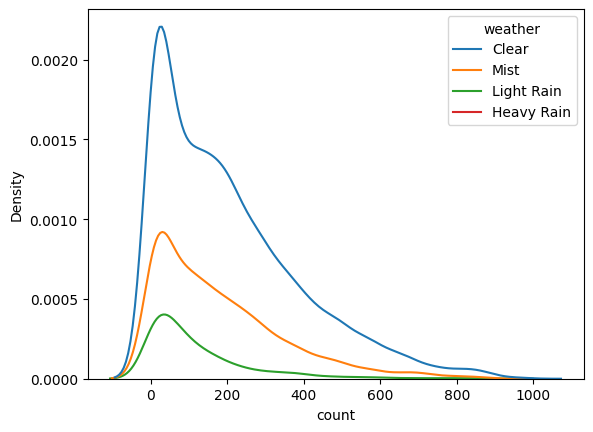

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')
plt.show()

Insight
- This proves our above inference from kurtosis and skew test.

### 5.2.4 Levene's Test

In [ ]:
from scipy.stats import levene

# Ho:  Variance across the group is similar
# Ha: Variance is not the same.

clear = df[df['weather'] == 'Clear']['count']
mist = df[df['weather'] == 'Mist']['count']
light_rain = df[df['weather'] == 'Light Rain']['count']
heavy_rain = df[df['weather'] == 'Heavy Rain']['count']

levene_stat, p_value = levene(clear, mist, light_rain, heavy_rain)

print(p_value)
if p_value < 0.05:
  print("Variances are not equal")
else:
  print("Variances are equal")

3.504937946833238e-35
Variances are not equal


### 5.2.5 One-way ANOVA Test

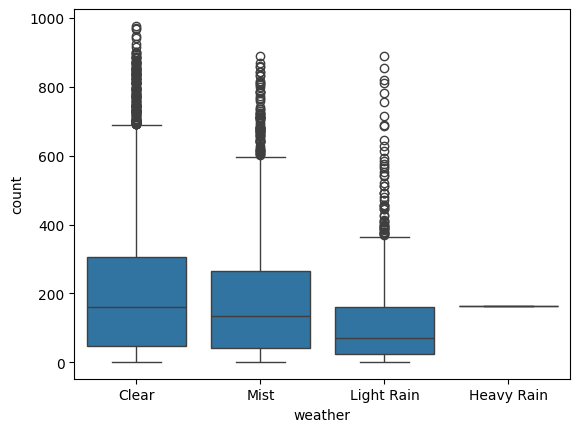

In [ ]:
sns.boxplot(x='weather', y='count', data=df)
plt.show()

Insight
- This proves our above inference from kurtosis and skew test.

In [ ]:
from scipy.stats import f_oneway
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(clear, mist, light_rain, heavy_rain)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

test statistic: 65.53024112793271
p_value: 5.482069475935669e-42
Reject H0
Atleast one group have different mean


Insight-
- After all the test we can say that, there is a significant difference between demand of bicycles for different Weather conditions.

## 5.3 Checking if the demand of bicycles on rent is the same for different Seasons?

### 5.3.1 Test for Normality

*QQ-Plot*
- The test is done and verified already which shows the data is **not normally distributed**.

*Shapiro-Wilk Test*
- The test is done and verified already which shows the data is **not normally distributed**.

Insights-
- Previous test proves that the dataset doesn't follow a gaussian ditribution. So therefore we have conduct other before deciding on One way Anova.

### 5.3.2 Skewness of season w.r.t count

In [ ]:
df.groupby('season')['count'].skew()

season
spring    1.888056
summer    1.003264
fall      0.991495
winter    1.172117
Name: count, dtype: float64

Insight
- Spring shows the highest positive skewness, indicating a distribution with a significant number of high counts.
- Summer, Fall, and Winter all have positive skewness values around 1, indicating moderately skewed distributions with a tendency towards higher counts, but not as extreme as spring.

### 5.3.3 Kurtosis test on different season.

In [ ]:
wether_kurt = df.groupby('season')['count'].apply(lambda x: x.kurtosis())
wether_kurt

season
spring    4.314757
summer    0.425213
fall      0.699383
winter    1.273485
Name: count, dtype: float64

Insights
- Spring has the highest kurtosis, indicating a distribution with a significant number of extreme values or outliers and a sharper peak.
- Winter has moderate kurtosis, showing some presence of extreme values but less pronounced than spring.
- Summer and Fall have the lowest kurtosis, indicating flatter distributions with fewer extreme values or outliers.

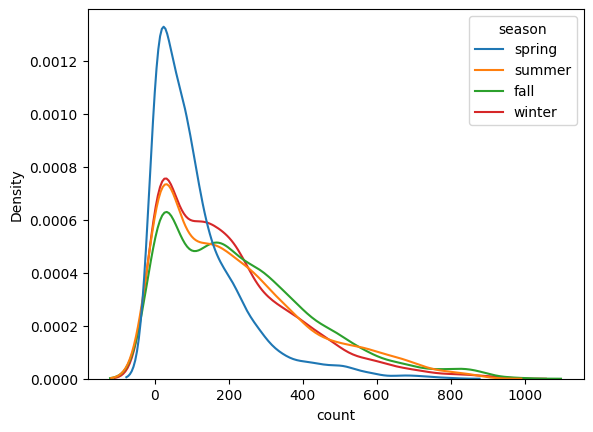

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'season')
plt.show()

Insight
- This proves our above inference from kurtosis and skew test.

### 5.3.4 Levene's Test

In [ ]:
from scipy.stats import levene

# Ho:  Variance across the group is similar
# Ha: Variance is not the same.

spring = df[df['season'] == 'spring']['count']
summer = df[df['season'] == 'summer']['count']
fall = df[df['season'] == 'fall']['count']
winter = df[df['season'] == 'winter']['count']

levene_stat, p_value = levene(spring, summer, fall, winter)

print(p_value)
if p_value < 0.05:
  print("Variances are not equal")
else:
  print("Variances are equal")

1.0147116860043298e-118
Variances are not equal


### 5.3.5 One-way ANOVA Test

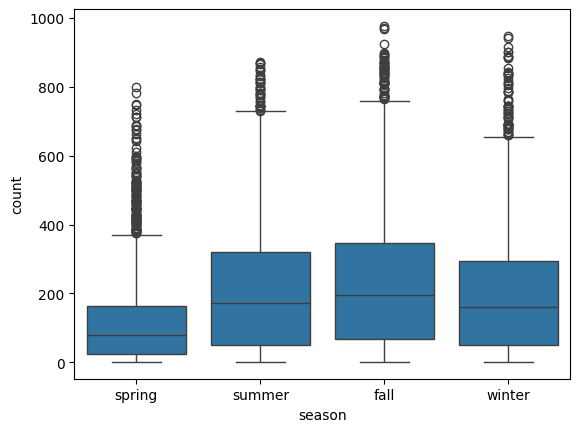

In [ ]:
sns.boxplot(x='season', y='count', data=df)
plt.show()

Insight
- This proves our above inference from kurtosis and skew test.

In [ ]:
from scipy.stats import f_oneway
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(spring, summer, fall, winter)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

test statistic: 236.94671081032106
p_value: 6.164843386499654e-149
Reject H0
Atleast one group have different mean


Insight-
- After all the test we can say that, There is a significant difference between demand of bicycles for different Seasons.

## 5.4 Checking if the Weather conditions are significantly different during different Seasons?

In [ ]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(df['weather'], df['season'])
print(observed)

season      spring  summer  fall  winter
weather                                 
Clear         1759    1801  1930    1702
Mist           715     708   604     807
Light Rain     211     224   199     225
Heavy Rain       1       0     0       0


In [ ]:
chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Weather condition and seasons are not independent")
else:
    print("Fail to reject H0")
    print("Weather condition and seasons are independent")

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
df: 9
exp_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject H0
Weather condition and seasons are not independent


Insight
- Based on the chi-squared test we performed, there is statistically significant dependency of weather and season based on the number of bikes rented.



In [ ]:
def colab2pdf():

  # @title Download Notebook in PDF Format{display-mode:'form'}

  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;

  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);

  %matplotlib inline

  def convert(b):

    try:

      s.value='🔄 Converting';b.disabled=True

      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))

      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)

      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]

      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")

      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]

      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)

      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))

      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)

      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet

      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'

    except Exception as e:s.value=f'❌ {str(e)}'

    finally:b.disabled=False

  if not pathlib.Path('/usr/local/bin/quarto').exists():

    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb

  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))

colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>